In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/Dataset_ML/Sentiment140/'

train_df = pd.read_csv(f'{base_path}train_data.csv')
test_df = pd.read_csv(f'{base_path}test_data.csv')

print("5 baris pertama DataFrame train_data:")
print(train_df.head())
print("\nInformasi DataFrame train_data:")
train_df.info()
print("\n5 baris pertama DataFrame test_data:")
print(test_df.head())
print("\nInformasi DataFrame test_data:")
test_df.info()
print("\nDistribusi Sentimen di train_data.csv:")
print(train_df['sentiment'].value_counts())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
5 baris pertama DataFrame train_data:
                                            sentence  sentiment
0  awww that s a bummer you shoulda got david car...          0
1  is upset that he can t update his facebook by ...          0
2  i dived many times for the ball managed to sav...          0
3     my whole body feels itchy and like its on fire          0
4  no it s not behaving at all i m mad why am i h...          0

Informasi DataFrame train_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523975 entries, 0 to 1523974
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentence   1523975 non-null  object
 1   sentiment  1523975 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ MB

5 baris pertama DataFrame test_data:
                                            sentenc

In [3]:
def preprocess_text_simplified(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [4]:
train_df['cleaned_sentence'] = train_df['sentence'].apply(preprocess_text_simplified)
test_df['cleaned_sentence'] = test_df['sentence'].apply(preprocess_text_simplified)

In [5]:


tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_sentence'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_sentence'])

print(f"\nBentuk matriks TF-IDF untuk data latih: {X_train_tfidf.shape}")
print(f"Bentuk matriks TF-IDF untuk data uji: {X_test_tfidf.shape}")




Bentuk matriks TF-IDF untuk data latih: (1523975, 10000)
Bentuk matriks TF-IDF untuk data uji: (359, 10000)


In [6]:
y_train = train_df['sentiment']
y_test = test_df['sentiment']


--- Evaluasi Model Multinomial Naive Bayes ---
Accuracy: 0.7967
Precision: 0.8225
Recall: 0.7637
F1-Score: 0.7920

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       177
           1       0.82      0.76      0.79       182

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359



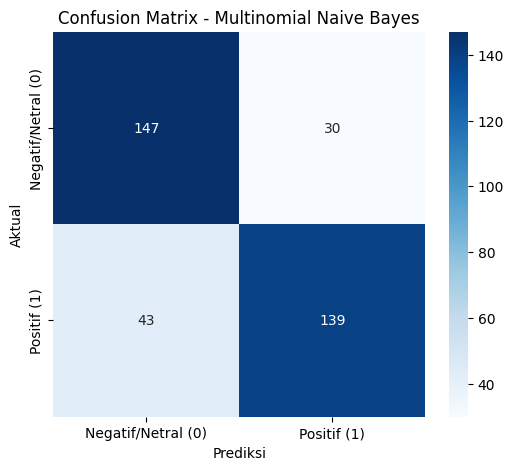

In [7]:
mnb_model = MultinomialNB()

mnb_model.fit(X_train_tfidf, y_train)

y_pred_mnb = mnb_model.predict(X_test_tfidf)

accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb)
recall_mnb = recall_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb)

print("\n--- Evaluasi Model Multinomial Naive Bayes ---")
print(f"Accuracy: {accuracy_mnb:.4f}")
print(f"Precision: {precision_mnb:.4f}")
print(f"Recall: {recall_mnb:.4f}")
print(f"F1-Score: {f1_mnb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif/Netral (0)', 'Positif (1)'],
            yticklabels=['Negatif/Netral (0)', 'Positif (1)'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [8]:
!pip freeze > requirements.txt